![lop](../../images/logo_diive1_128px.png)

<span style='font-size:40px; display:block;'>
<b>
    Quick Flux Processing Chain
</b>
</span>

---
**Notebook version**: `1` (5 Feb 2024)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

# Description

- quick (simplified) version of the flux processing chain
- uses a lot of default values, which means not a lot of user input is needed
- recommended to quickly check on current data
- produces data up to Level-3.2
- for more info about flux levels see [Flux Processing Chain](https://www.swissfluxnet.ethz.ch/index.php/data/ecosystem-fluxes/flux-processing-chain/)

# Settings

In [1]:
FLUXVARS = ['FC', 'LE', 'H']  # Name of the flux variable in fluxnet output files: FC, FH2O, LE, ET, H, FN2O, FCH4; must be given as list even if there is only one variable
SOURCEDIRS = [r'F:\TMP\FRU\Level-0']  # Folders where the EddyPro output files are located
SITE_LAT = 47.115833  # Latitude of site
SITE_LON = 8.537778  # Longitude of site
FILETYPE = 'EDDYPRO-FLUXNET-CSV-30MIN'  # Filetype of EddyPro output files, can be 'EDDYPRO-FLUXNET-CSV-30MIN' or 'EDDYPRO-FULL-OUTPUT-CSV-30MIN'
UTC_OFFSET = 1  # Time stamp offset in relation to UTC, e.g. 1 for UTC+01:00 (CET), important for the calculation of potential radiation for detecting daytime and nighttime
NIGHTTIME_THRESHOLD = 50  # Threshold for potential radiation in W m-2, conditions below threshold are nighttime
DAYTIME_ACCEPT_QCF_BELOW = 2
NIGHTTIMETIME_ACCEPT_QCF_BELOW = 2

# Imports

In [2]:
import importlib.metadata
import warnings
from datetime import datetime
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
from diive.pkgs.fluxprocessingchain.fluxprocessingchain import QuickFluxProcessingChain
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.76.2


# Run

Found 24 files with extension *.csv and file IDs ['eddypro_', '_fluxnet_']:
 Found file #1: F:\TMP\FRU\Level-0\eddypro_CH-FRU_FR-20240109-125451_fluxnet_2024-01-09T133440_adv.csv
 Found file #2: F:\TMP\FRU\Level-0\eddypro_CH-FRU_FR-20240121-150304_fluxnet_2024-01-21T150535_adv.csv
 Found file #3: F:\TMP\FRU\Level-0\eddypro_CH-FRU_FR-20240207-120456_fluxnet_2024-02-07T120911_adv.csv
 Found file #4: F:\TMP\FRU\Level-0\eddypro_CH-FRU_FR-20240219-110841_fluxnet_2024-02-19T111422_adv.csv
 Found file #5: F:\TMP\FRU\Level-0\eddypro_CH-FRU_FR-20240222-083752_fluxnet_2024-02-22T084217_adv.csv
 Found file #6: F:\TMP\FRU\Level-0\eddypro_CH-FRU_FR-20240227-094430_fluxnet_2024-02-27T094454_adv.csv
 Found file #7: F:\TMP\FRU\Level-0\eddypro_CH-FRU_FR-20240304-105644_fluxnet_2024-03-04T105943_adv.csv
 Found file #8: F:\TMP\FRU\Level-0\eddypro_CH-FRU_FR-20240308-102149_fluxnet_2024-03-08T102303_adv.csv
 Found file #9: F:\TMP\FRU\Level-0\eddypro_CH-FRU_FR-20240311-113301_fluxnet_2024-03-11T113345_adv.c

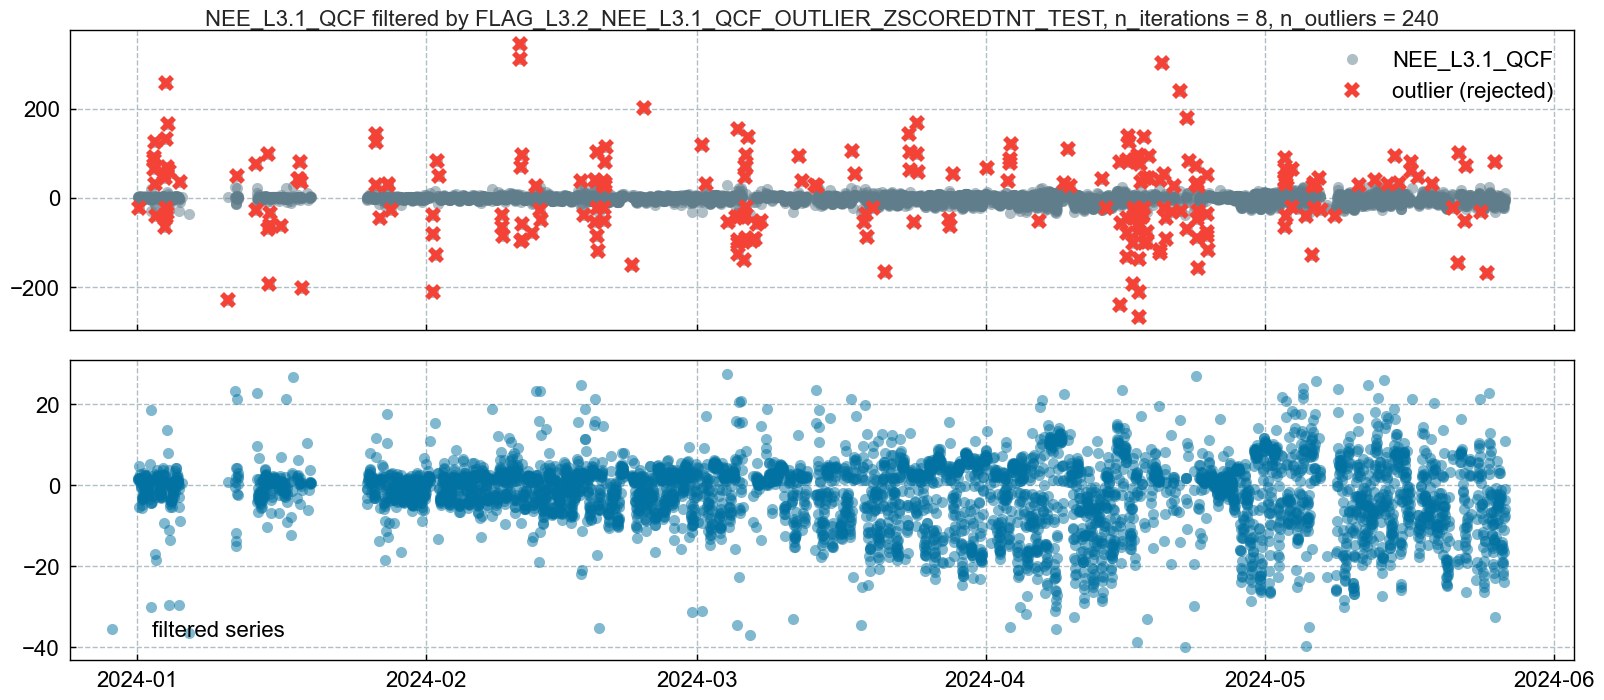

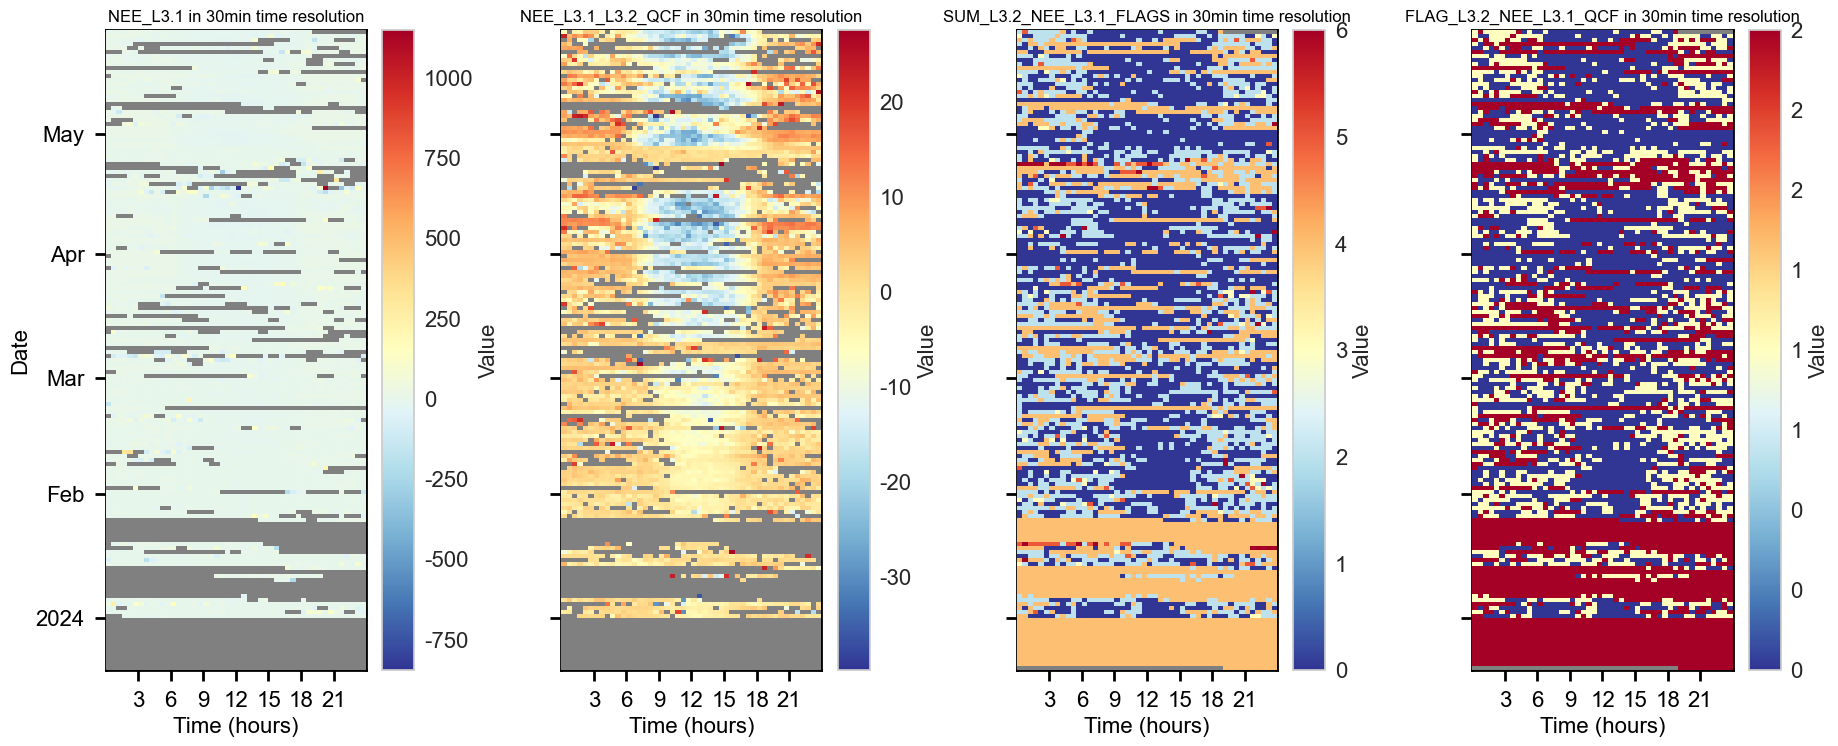

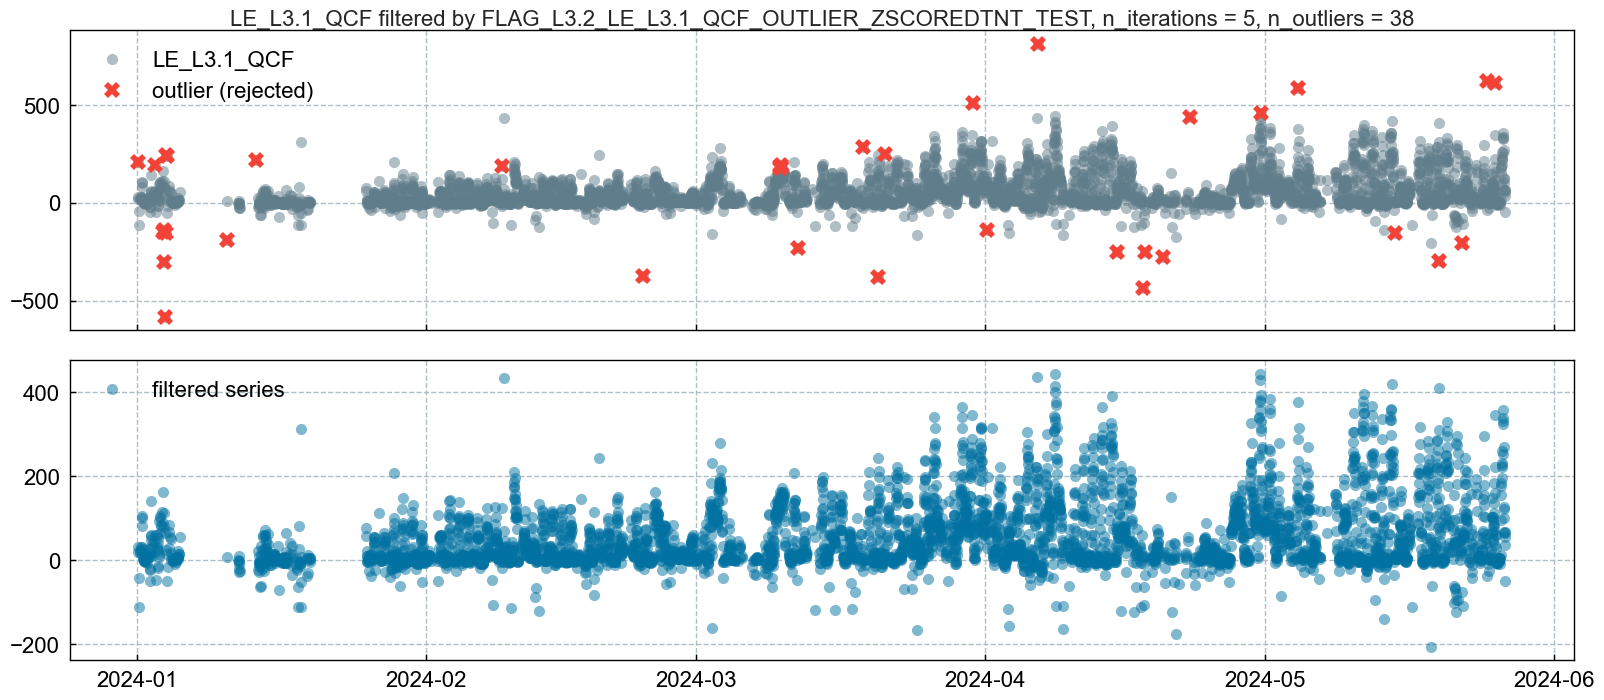

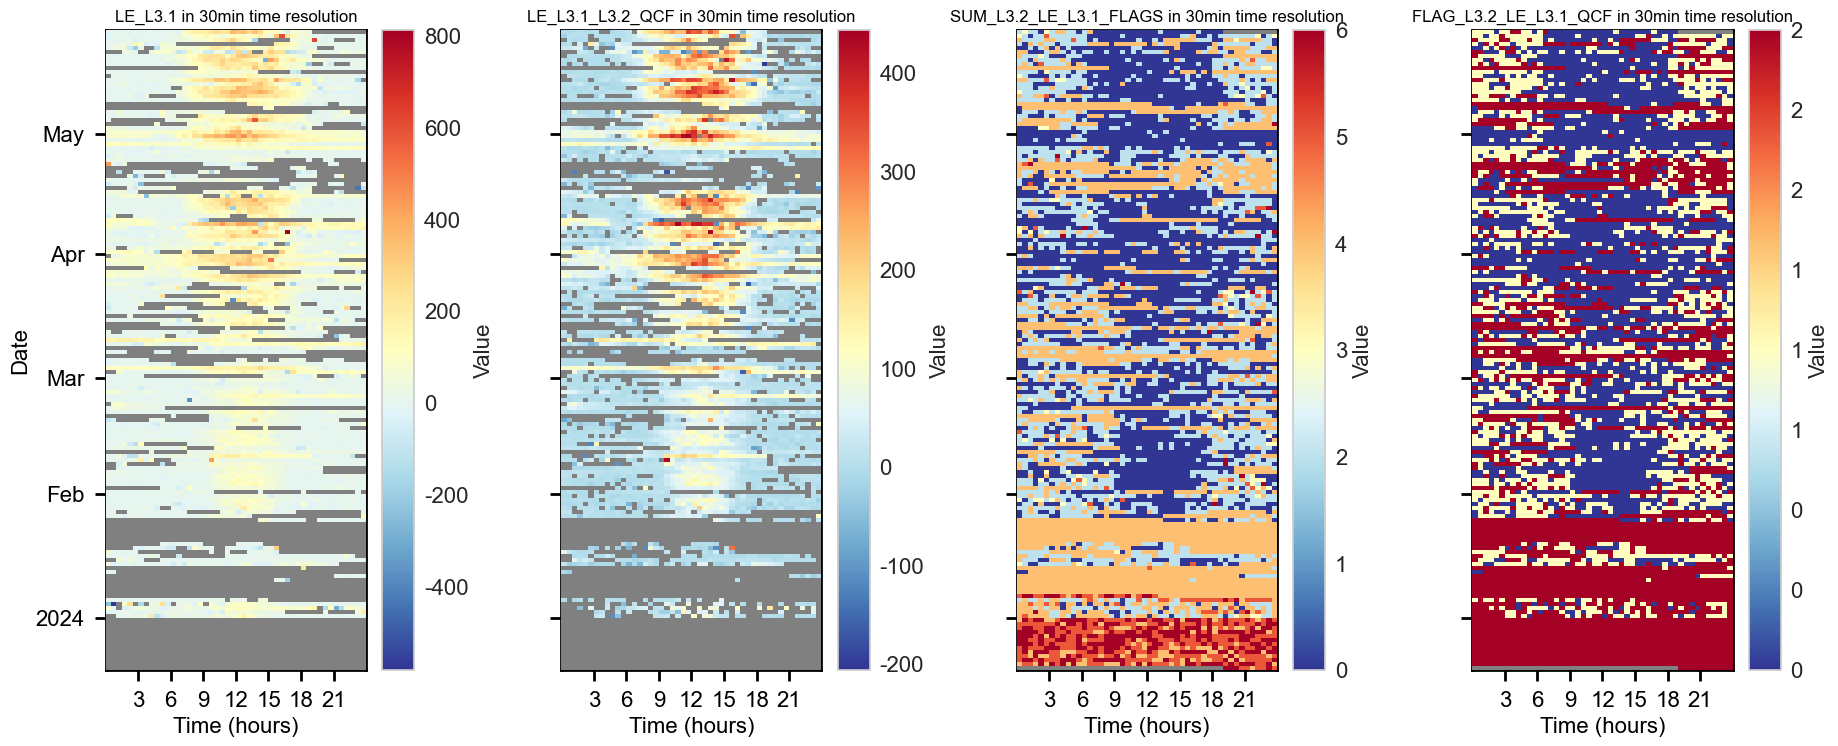

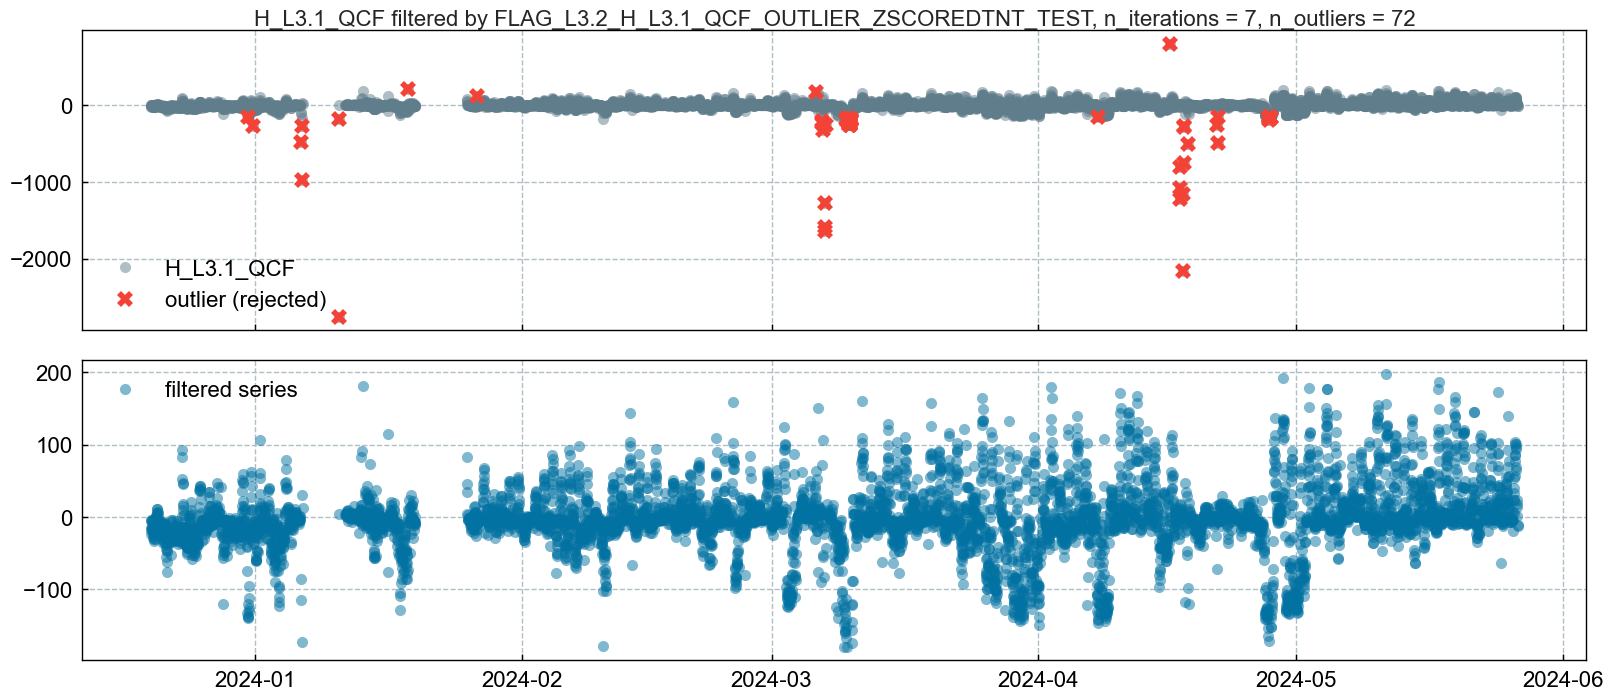

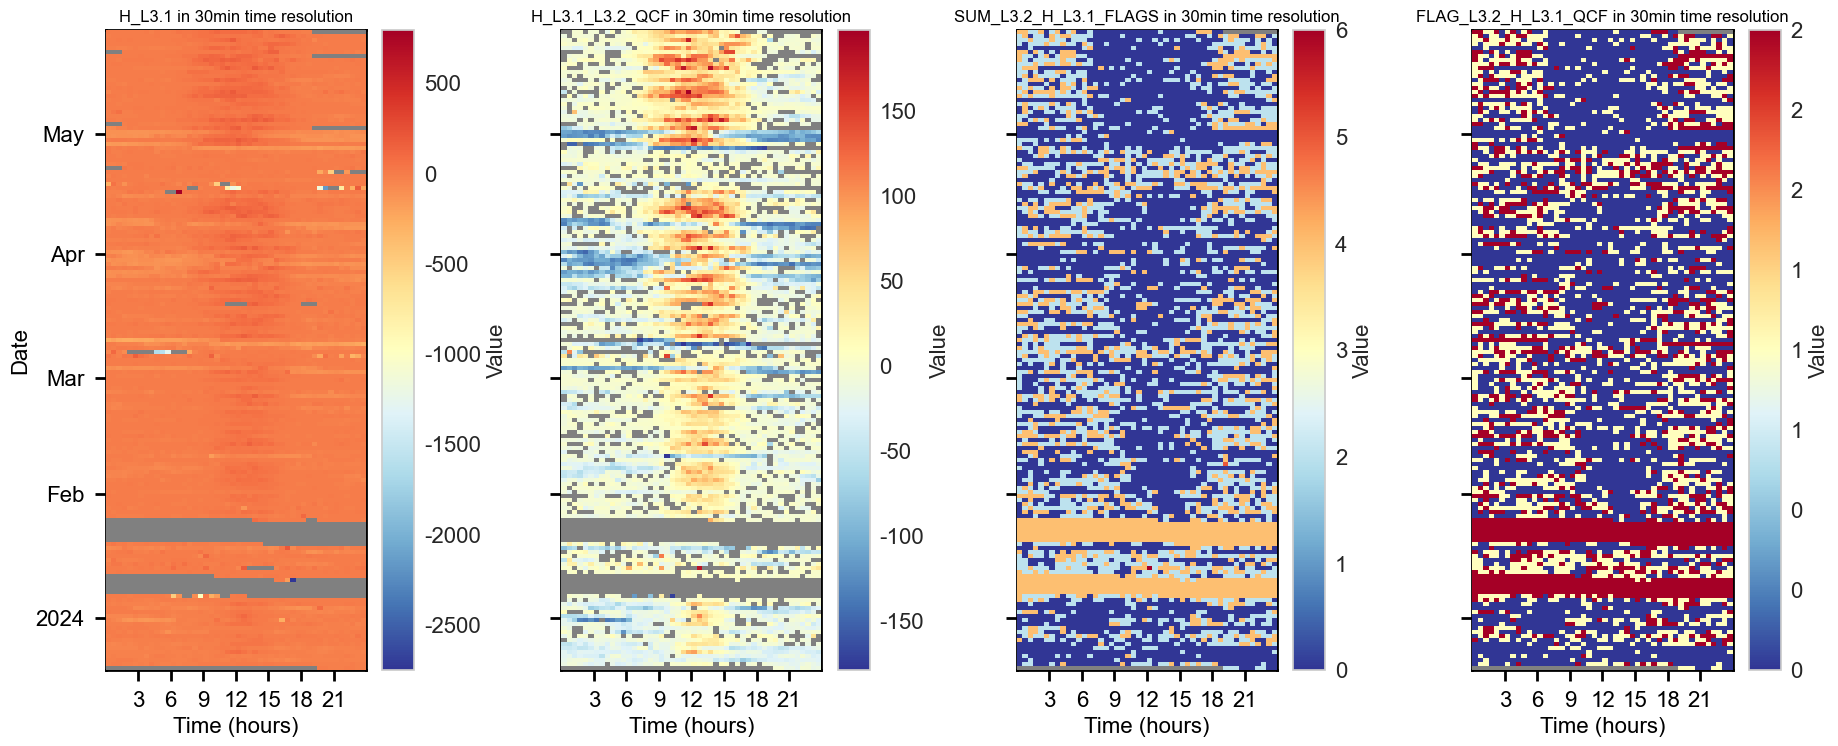

In [3]:
qfpc = QuickFluxProcessingChain(
    fluxvars=FLUXVARS,
    sourcedirs=SOURCEDIRS,
    site_lat=SITE_LAT,
    site_lon=SITE_LON,
    filetype=FILETYPE,
    utc_offset=UTC_OFFSET,
    nighttime_threshold=NIGHTTIME_THRESHOLD,
    daytime_accept_qcf_below=DAYTIME_ACCEPT_QCF_BELOW,
    nighttimetime_accept_qcf_below=NIGHTTIMETIME_ACCEPT_QCF_BELOW
)

</br>

In [4]:
quickresults_df =  qfpc.fpc.fpc_df
quickresults_df.head()

,H,SW_IN_POT,DAYTIME,NIGHTTIME,FLAG_L2_H_MISSING_TEST,FLAG_L2_H_SSITC_TEST,...,SUM_L3.2_H_L3.1_HARDFLAGS,SUM_L3.2_H_L3.1_SOFTFLAGS,SUM_L3.2_H_L3.1_FLAGS,FLAG_L3.2_H_L3.1_QCF,H_L3.1_L3.2_QCF,H_L3.1_L3.2_QCF0
TIMESTAMP_MIDDLE,,,,,,,,,,,,,
2023-12-19 19:15:00,-10.84870,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,2.0,1.0,NaN,NaN
2023-12-19 19:45:00,-3.93246,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,2.0,1.0,-5.022240,NaN
2023-12-19 20:15:00,-6.02293,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,2.0,1.0,-3.678600,NaN
2023-12-19 20:45:00,-18.94570,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-18.396412,-18.396412
2023-12-19 21:15:00,-14.25550,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-15.050010,-15.050010


</br>

# **End of notebook**
Congratulations, you reached the end of this notebook! Before you go let's store your finish time.

In [5]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2024-05-28 13:24:31
